# T-SNE + K-Means Clustering for MNIST-like Image Data

This notebook demonstrates using t-SNE dimensionality reduction combined with K-Means clustering to analyze unlabelled image data. The process includes:

1. Data loading and preprocessing
2. Dimensionality reduction with t-SNE
3. Clustering with K-Means
4. Visualization of results
5. Manual label assignment
6. Training classifiers on the generated labels

# Setup and Imports

In [3]:
# Install required packages
!pip install numpy matplotlib pandas scikit-learn seaborn joblib

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import joblib

# Timer function for performance tracking
def timer_func(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Function {func.__name__} executed in {end_time-start_time:.4f} seconds")
        return result, end_time-start_time
    return wrapper

## Data Loading and Preprocessing

Load the image data, reshape it for analysis, and prepare it for dimensionality reduction.

In [4]:
# Load data
print("Loading data...")
file_path = "unlabelled_train_data_images.npy"
data = np.load(file_path, allow_pickle=True)
print(f"Original data shape: {data.shape}")

# Reshape data for processing
reshaped_data = data.reshape(data.shape[0], -1)
print(f"Reshaped data shape: {reshaped_data.shape}")

# Take a sample of the data for faster processing
# Using 20% of data for demonstration
sample_size = int(reshaped_data.shape[0] * 0.2)
indices = np.random.choice(reshaped_data.shape[0], size=sample_size, replace=False)
reduced_data = reshaped_data[indices]
reduced_original_data = data[indices]
print(f"Reduced data shape (20% of original): {reduced_data.shape}")

# Preprocessing with StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(reduced_data)
print("Data scaled.")

# Create train/test split
X_train, X_test, original_train_indices, original_test_indices = train_test_split(
    scaled_data, indices, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Loading data...
Original data shape: (60000, 1, 28, 28)
Reshaped data shape: (60000, 784)
Reduced data shape (20% of original): (12000, 784)
Data scaled.
Training set: (9600, 784), Test set: (2400, 784)


## T-SNE + K-Means Clustering Pipeline

Implement a pipeline that:
1. Reduces dimensionality using t-SNE
2. Applies K-Means clustering
3. Evaluates clustering quality with silhouette score

In [5]:
@timer_func
def tsne_kmeans_pipeline(X_train, X_test, original_data, n_clusters=10):
    print("Running t-SNE + K-means pipeline...")
    
    # Apply t-SNE for dimensionality reduction
    print("Running t-SNE dimensionality reduction...")
    tsne = TSNE(
        init='pca',
        learning_rate='auto', 
        n_components=2, 
        random_state=42, 
        perplexity=30, 
        n_iter=2000
    )
    X_train_tsne = tsne.fit_transform(X_train)
    print(f"t-SNE transformed data shape: {X_train_tsne.shape}")
    
    # Apply K-means clustering
    print("Running K-means clustering...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_tsne)
    
    # Calculate silhouette score for clustering quality
    score = silhouette_score(X_train_tsne, cluster_labels)
    print(f"t-SNE + K-means silhouette score: {score:.4f}")
    
    # For test set predictions, we need a classifier since t-SNE doesn't generalize to new data points
    # Instead, we'll use PCA for the test set as a practical approach
    print("Creating PCA model for test set predictions...")
    pca = PCA(n_components=50, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    return {
        "X_train_tsne": X_train_tsne,
        "clusters": cluster_labels,
        "X_train_pca": X_train_pca,
        "X_test_pca": X_test_pca,
        "score": score,
        "kmeans": kmeans,
        "pca": pca
    }

# Run the t-SNE + K-means pipeline
print("\n=== Running t-SNE + K-means Pipeline ===")
results, execution_time = tsne_kmeans_pipeline(X_train, X_test, reduced_original_data)

print(f"\nTotal execution time: {execution_time:.4f} seconds")
print(f"Silhouette score: {results['score']:.4f}")


=== Running t-SNE + K-means Pipeline ===
Running t-SNE + K-means pipeline...
Running t-SNE dimensionality reduction...


c:\Users\rmkp\Documents\IITB\PML-project-3\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE transformed data shape: (9600, 2)
Running K-means clustering...
t-SNE + K-means silhouette score: 0.4308
Creating PCA model for test set predictions...
Function tsne_kmeans_pipeline executed in 51.9533 seconds

Total execution time: 51.9533 seconds
Silhouette score: 0.4308


## Cluster Analysis and Visualization

Analyze the distribution of clusters and visualize the results.


Cluster distribution:
Cluster 0: 856 samples
Cluster 1: 981 samples
Cluster 2: 877 samples
Cluster 3: 1216 samples
Cluster 4: 778 samples
Cluster 5: 977 samples
Cluster 6: 956 samples
Cluster 7: 952 samples
Cluster 8: 917 samples
Cluster 9: 1090 samples


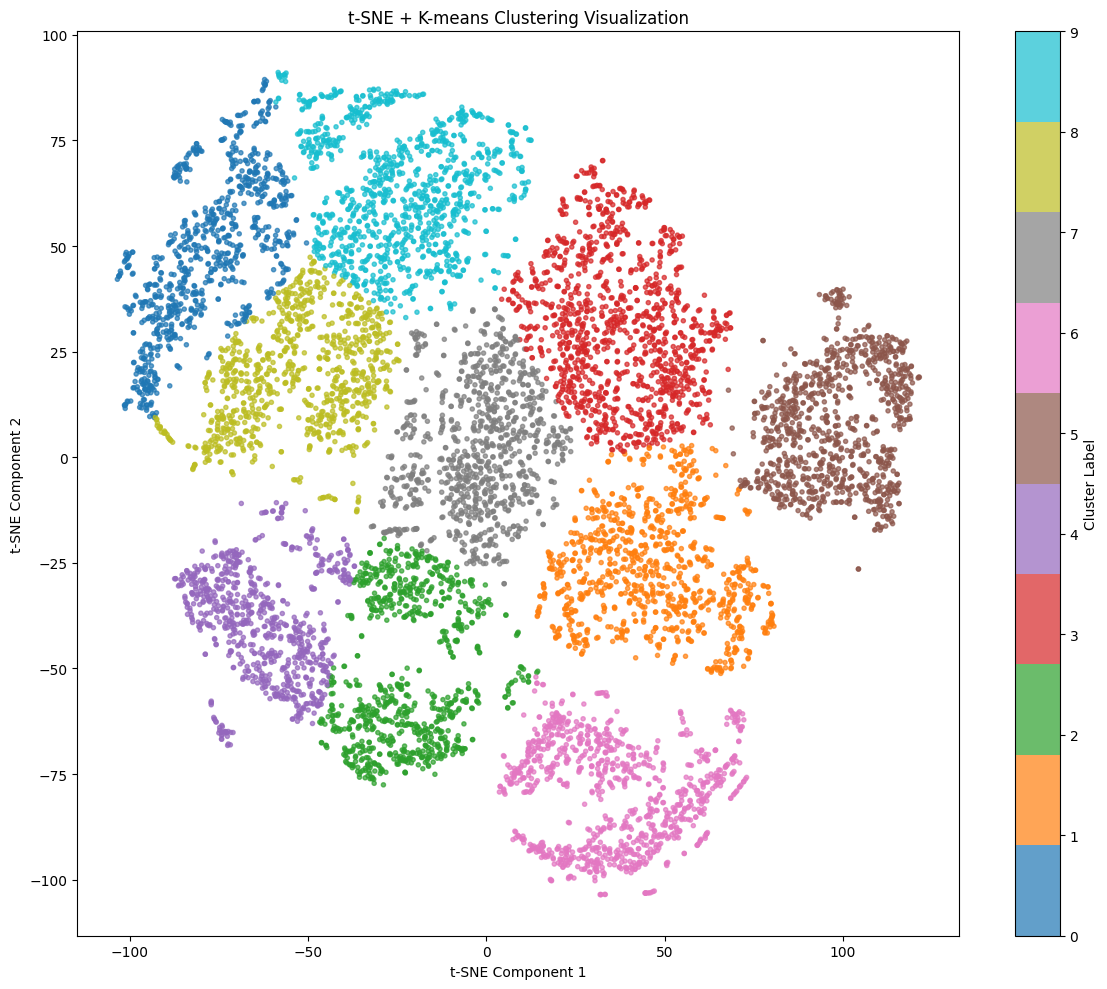


========== t-SNE + K-MEANS CLUSTERING REPORT ==========
Silhouette score: 0.4308

Class distribution:
Cluster 0: 856 samples (8.9%)
Cluster 1: 981 samples (10.2%)
Cluster 2: 877 samples (9.1%)
Cluster 3: 1216 samples (12.7%)
Cluster 4: 778 samples (8.1%)
Cluster 5: 977 samples (10.2%)
Cluster 6: 956 samples (10.0%)
Cluster 7: 952 samples (9.9%)
Cluster 8: 917 samples (9.6%)
Cluster 9: 1090 samples (11.4%)


In [6]:
# Print cluster distribution
print("\nCluster distribution:")
unique, counts = np.unique(results['clusters'], return_counts=True)
for i, (cluster, count) in enumerate(zip(unique, counts)):
    print(f"Cluster {cluster}: {count} samples")

# Visualize clusters in 2D space
plt.figure(figsize=(12, 10))
plt.scatter(results['X_train_tsne'][:, 0], results['X_train_tsne'][:, 1], 
            c=results['clusters'], cmap='tab10', marker='.', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('t-SNE + K-means Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()

# Output the comprehensive report
print("\n========== t-SNE + K-MEANS CLUSTERING REPORT ==========")
print(f"Silhouette score: {results['score']:.4f}")
print("\nClass distribution:")
for i, (cluster, count) in enumerate(zip(unique, counts)):
    print(f"Cluster {cluster}: {count} samples ({count/len(results['clusters'])*100:.1f}%)")

## Visualizing Images by Cluster

Display sample images from each cluster to help interpret what patterns the algorithm has found.

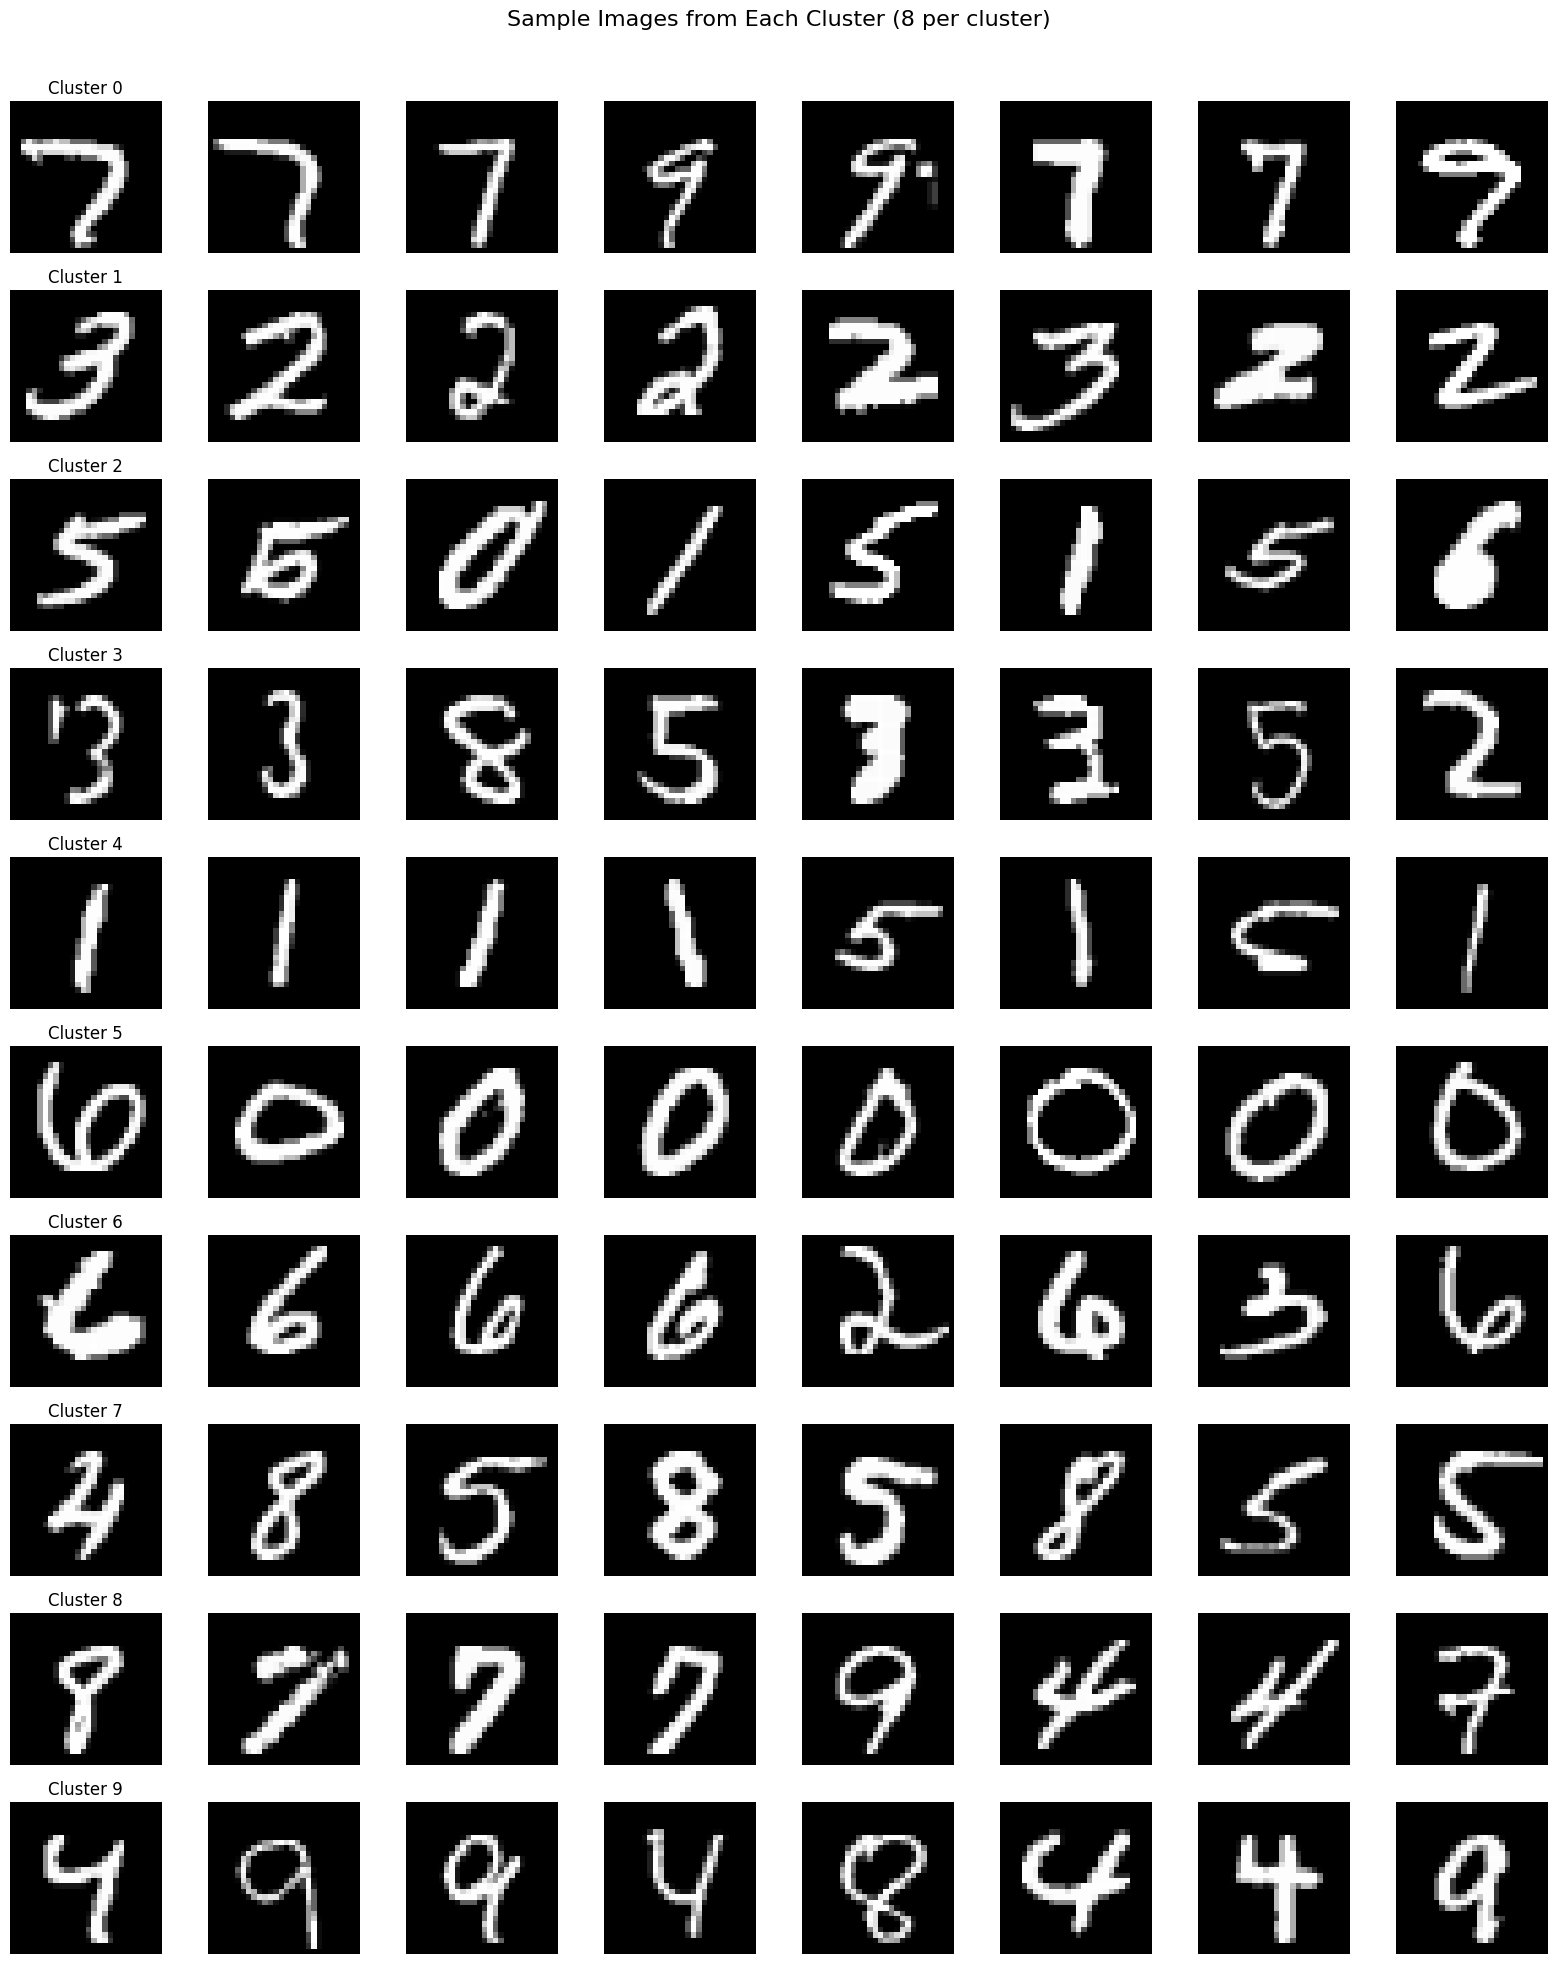

In [7]:
# Visualize 8 images from each cluster
n_clusters = len(np.unique(results['clusters']))
fig = plt.figure(figsize=(16, 2*n_clusters))
fig.suptitle('Sample Images from Each Cluster (8 per cluster)', fontsize=16)

for i in range(n_clusters):
    # Get indices of samples in this cluster
    cluster_indices = np.where(results['clusters'] == i)[0]
    
    # Select 8 random samples (or fewer if the cluster has less than 8)
    sample_size = min(8, len(cluster_indices))
    if sample_size > 0:
        sample_indices = np.random.choice(cluster_indices, sample_size, replace=False)
        
        # Display images
        for j, idx in enumerate(sample_indices):
            plt.subplot(n_clusters, 8, i*8 + j + 1)
            
            # Map from training indices to original data indices
            original_idx = original_train_indices[idx]
            
            # Display the image
            plt.imshow(np.squeeze(data[original_idx]), cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(f'Cluster {i}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Processing Full Dataset

Apply the same approach to the full dataset to generate labels for all images.

In [8]:
# Load full data
print("Loading data...")
file_path = "unlabelled_train_data_images.npy"
data = np.load(file_path, allow_pickle=True)
print(f"Original data shape: {data.shape}")

# Reshape data for processing
X_train = data.reshape(data.shape[0], -1)
print(f"Reshaped data shape: {X_train.shape}")

# Preprocessing
print("Scaling data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print("Data scaled.")

@timer_func
def generate_labels(X_train_scaled, n_clusters=10, use_pca_first=True):
    """
    Generate labels for unlabelled data using dimensionality reduction and clustering.
    
    Args:
        X_train_scaled: Scaled input data
        n_clusters: Number of clusters to create (becomes number of classes)
        use_pca_first: Whether to use PCA before t-SNE for better performance
        
    Returns:
        Dictionary containing embeddings, labels and models
    """
    print("Generating labels using dimensionality reduction + clustering...")
    
    # Step 1: Initial dimensionality reduction with PCA (optional but recommended for large datasets)
    if use_pca_first and X_train_scaled.shape[1] > 100:
        print("Applying initial PCA reduction...")
        n_components = min(100, X_train_scaled.shape[1] // 2)
        initial_pca = PCA(n_components=n_components, random_state=42)
        X_reduced = initial_pca.fit_transform(X_train_scaled)
        print(f"Initial PCA reduction shape: {X_reduced.shape}")
    else:
        X_reduced = X_train_scaled
    
    # Step 2: Apply t-SNE for better embedding
    print("Running t-SNE dimensionality reduction...")
    tsne = TSNE(
        n_components=2, 
        init='pca',
        learning_rate='auto', 
        random_state=42, 
        perplexity=30, 
        n_iter=2000
    )
    X_embedded = tsne.fit_transform(X_reduced)
    print(f"t-SNE embedding shape: {X_embedded.shape}")
    
    # Step 3: Apply K-means clustering to create labels
    print("Running K-means clustering...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    Y_train = kmeans.fit_predict(X_embedded)
    print(f"Generated {n_clusters} labels for {len(Y_train)} samples")
    
    # Step 4: Create a more general-purpose embedding for future use
    # (t-SNE doesn't support transform for new data, so we use PCA)
    print("Creating PCA embeddings for future use...")
    pca = PCA(n_components=50, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    
    return {
        "X_embedded": X_embedded,  # 2D embedding for visualization
        "Y_train": Y_train,        # Generated labels
        "X_train_pca": X_train_pca, # More general embedding for ML
        "kmeans": kmeans,          # K-means model
        "pca": pca,                # PCA model for future transforms
        "scaler": scaler           # Scaler for preprocessing new data
    }

# Generate labels
print("\n=== Generating Labels ===")
results, execution_time = generate_labels(X_train_scaled, n_clusters=10)

# Print distribution of generated labels
print("\nLabel distribution:")
unique, counts = np.unique(results["Y_train"], return_counts=True)
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples ({count/len(results['Y_train'])*100:.1f}%)")

# Save the generated labels and models
print("\nSaving results...")
np.save("Y_train_generated.npy", results["Y_train"])
np.save("X_train_pca_embedded.npy", results["X_train_pca"])
joblib.dump(results["kmeans"], "kmeans_model.pkl")
joblib.dump(results["pca"], "pca_model.pkl")
joblib.dump(results["scaler"], "scaler_model.pkl")

Loading data...
Original data shape: (60000, 1, 28, 28)
Reshaped data shape: (60000, 784)
Scaling data...
Data scaled.

=== Generating Labels ===
Generating labels using dimensionality reduction + clustering...
Applying initial PCA reduction...
Initial PCA reduction shape: (60000, 100)
Running t-SNE dimensionality reduction...


c:\Users\rmkp\Documents\IITB\PML-project-3\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE embedding shape: (60000, 2)
Running K-means clustering...
Generated 10 labels for 60000 samples
Creating PCA embeddings for future use...
Function generate_labels executed in 305.8075 seconds

Label distribution:
Label 0: 7293 samples (12.2%)
Label 1: 5722 samples (9.5%)
Label 2: 6056 samples (10.1%)
Label 3: 4017 samples (6.7%)
Label 4: 5970 samples (10.0%)
Label 5: 6398 samples (10.7%)
Label 6: 5832 samples (9.7%)
Label 7: 6258 samples (10.4%)
Label 8: 6868 samples (11.4%)
Label 9: 5586 samples (9.3%)

Saving results...


['scaler_model.pkl']

## Visualization of Generated Labels

Visual representation of the clusters in 2D space.

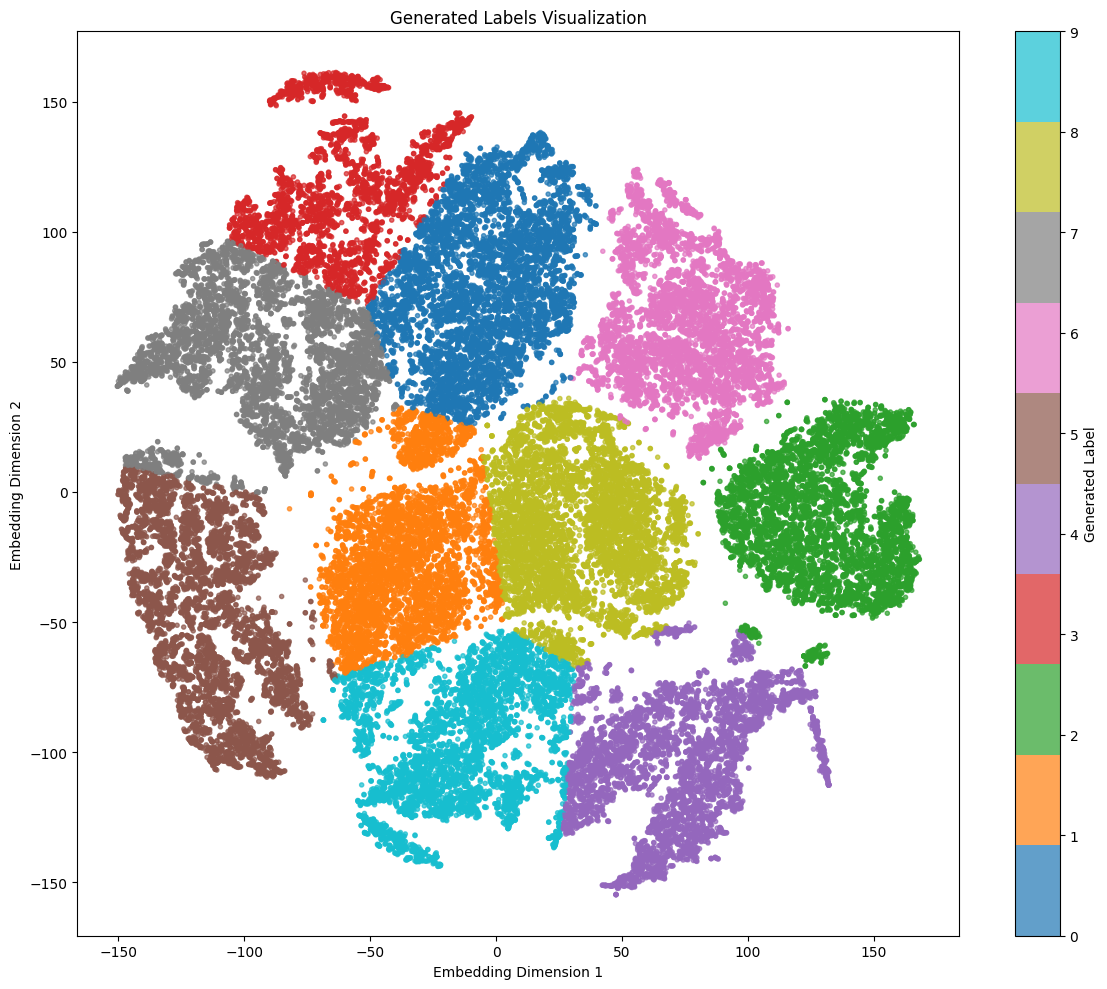


Total execution time: 305.8075 seconds

Label generation complete.
- Generated labels saved as 'Y_train_generated.npy'
- PCA embeddings saved as 'X_train_pca_embedded.npy'
- Models saved as 'kmeans_model.pkl', 'pca_model.pkl', and 'scaler_model.pkl'


In [9]:
# Visualize the clusters/labels
plt.figure(figsize=(12, 10))
plt.scatter(
    results["X_embedded"][:, 0], 
    results["X_embedded"][:, 1],
    c=results["Y_train"], 
    cmap='tab10', 
    marker='.', 
    alpha=0.7
)
plt.colorbar(label='Generated Label')
plt.title('Generated Labels Visualization')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.tight_layout()
plt.savefig("generated_labels_viz.png")
plt.show()

print(f"\nTotal execution time: {execution_time:.4f} seconds")
print("\nLabel generation complete.")
print("- Generated labels saved as 'Y_train_generated.npy'")
print("- PCA embeddings saved as 'X_train_pca_embedded.npy'")
print("- Models saved as 'kmeans_model.pkl', 'pca_model.pkl', and 'scaler_model.pkl'")

## Manual Digit Assignment

Interface for manually assigning actual digit labels (0-9) to the discovered clusters.

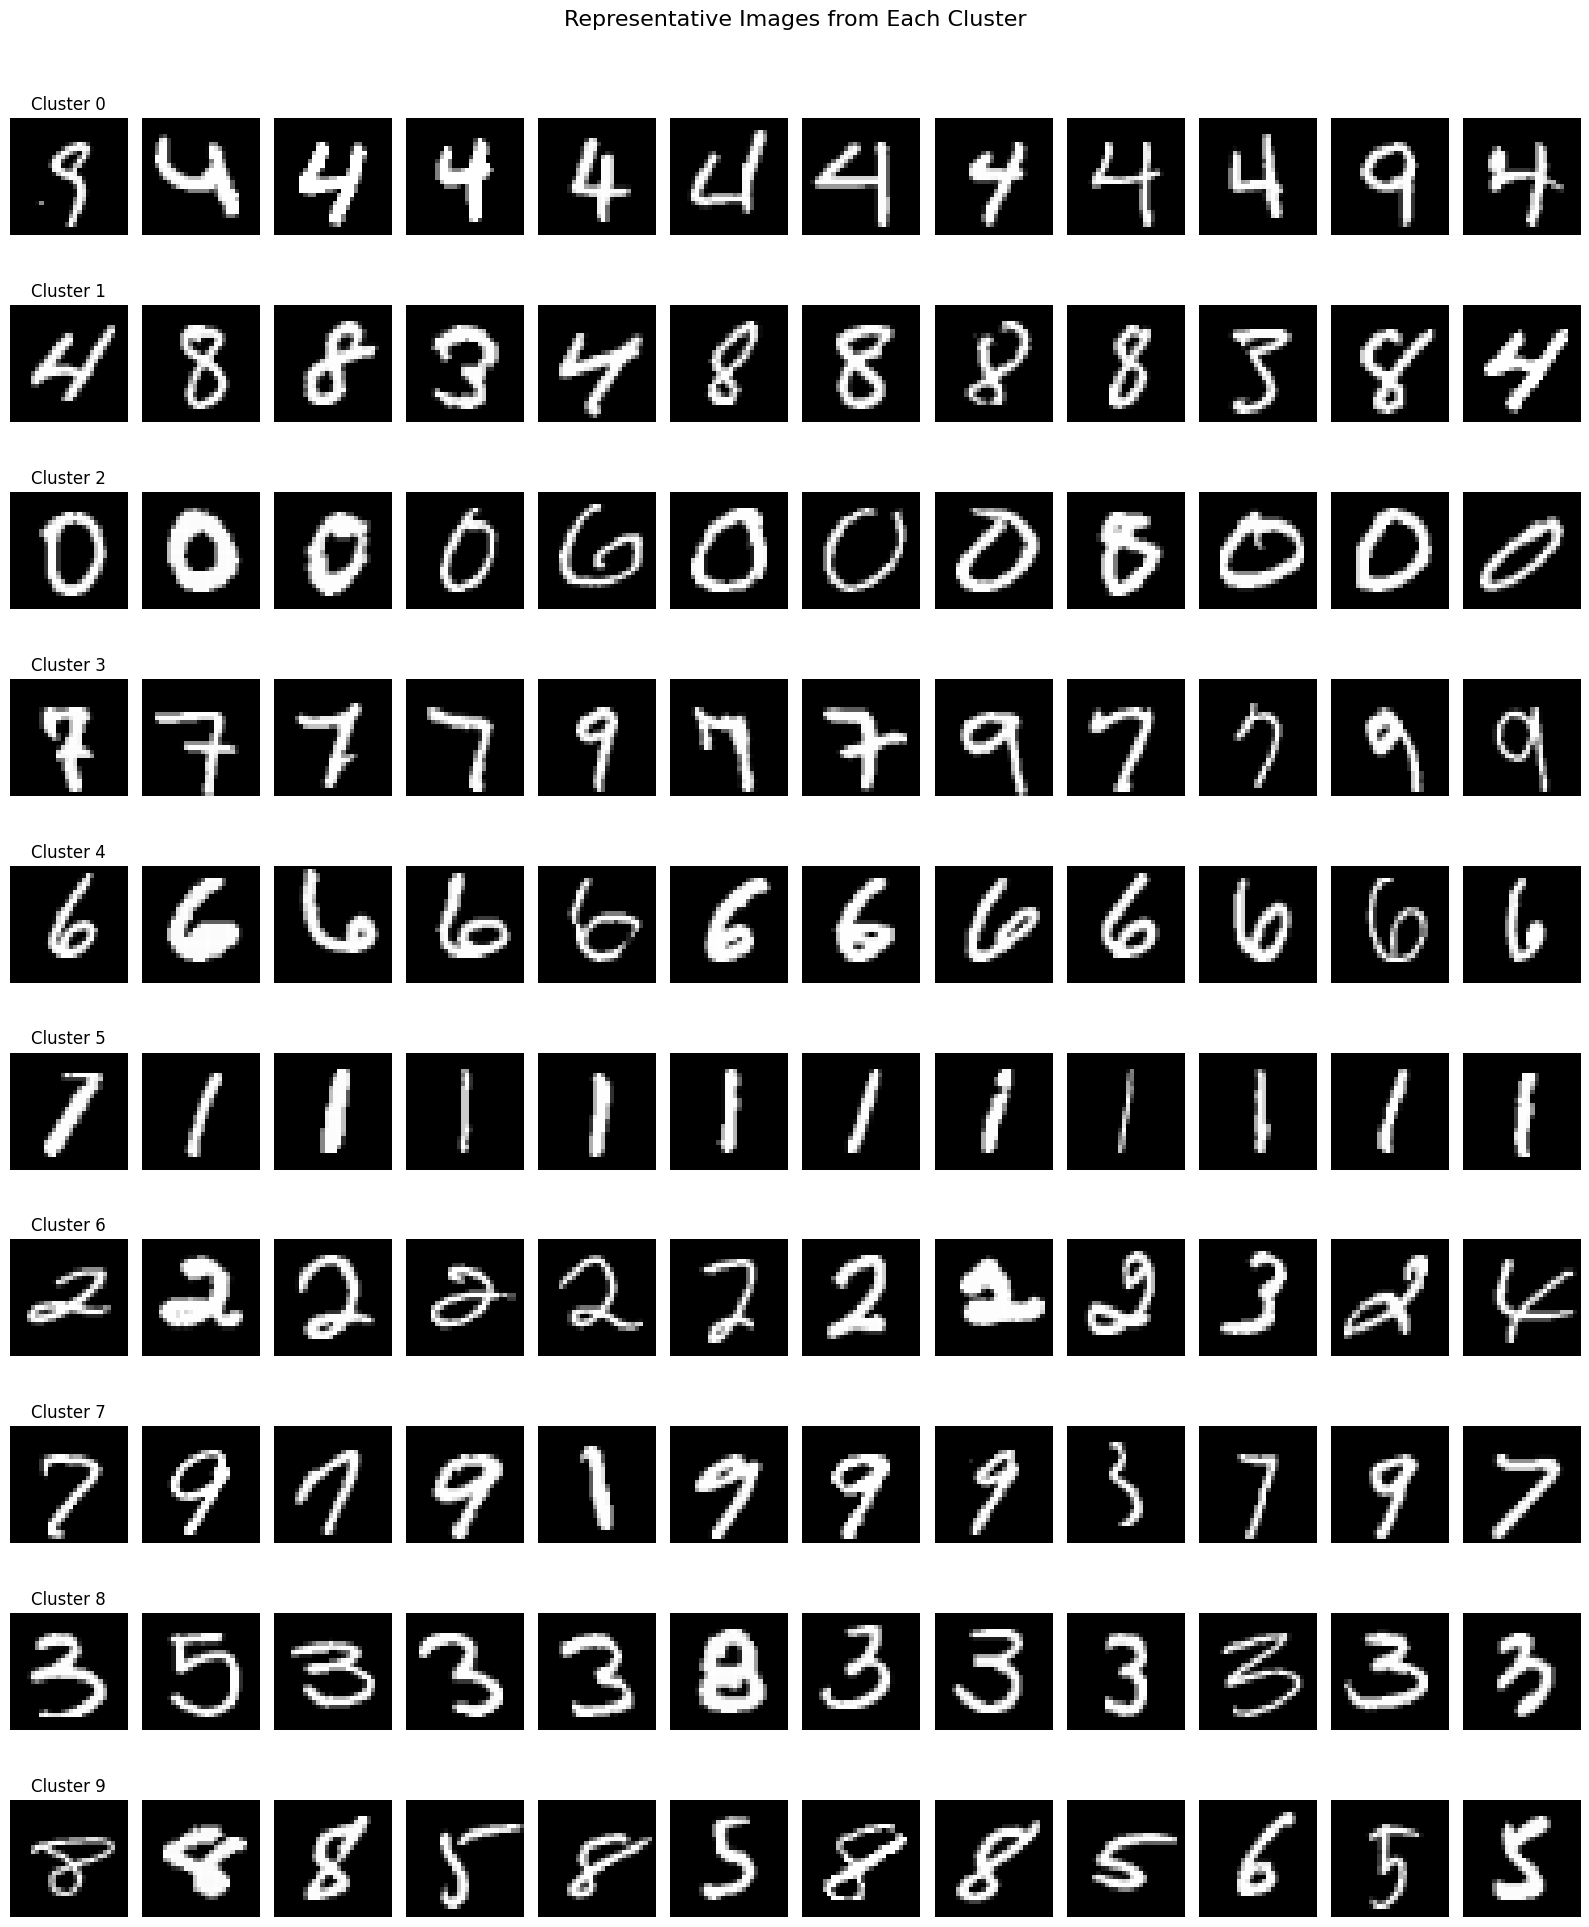


=== MANUAL CLUSTER LABELING ===
Based on the images above, assign digit labels (0-9) to each cluster:


In [10]:
# Cell to manually assign digit labels to clusters
from IPython.display import display, HTML

# Load the generated models and labels
kmeans = joblib.load("kmeans_model.pkl")
Y_train = np.load("Y_train_generated.npy")
data = np.load("unlabelled_train_data_images.npy", allow_pickle=True)

# Create a visualization to help with manual labeling
n_clusters = len(np.unique(Y_train))
fig = plt.figure(figsize=(16, 2*n_clusters))
fig.suptitle('Representative Images from Each Cluster', fontsize=16)

# Dictionary to store manual label assignments
manual_labels = {}

# Display more representative samples from each cluster
samples_per_cluster = 12  # Show more samples to better identify digits

for i in range(n_clusters):
    # Get indices of samples in this cluster
    cluster_indices = np.where(Y_train == i)[0]
    
    # Select samples from the cluster
    sample_size = min(samples_per_cluster, len(cluster_indices))
    if sample_size > 0:
        sample_indices = np.random.choice(cluster_indices, sample_size, replace=False)
        
        # Display images
        for j, idx in enumerate(sample_indices):
            plt.subplot(n_clusters, samples_per_cluster, i*samples_per_cluster + j + 1)
            
            # Display the image
            plt.imshow(np.squeeze(data[idx]), cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(f'Cluster {i}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Interactive manual labeling interface
print("\n=== MANUAL CLUSTER LABELING ===")
print("Based on the images above, assign digit labels (0-9) to each cluster:")

# Initialize with placeholder values (-1 means not assigned yet)
manual_cluster_to_digit = {i: -1 for i in range(n_clusters)}

# Get user input for each cluster
for cluster in range(n_clusters):
    valid_input = False
    while not valid_input:
        try:
            digit = int(input(f"Assign digit to Cluster {cluster} (0-9): "))
            if 0 <= digit <= 9:
                manual_cluster_to_digit[cluster] = digit
                valid_input = True
            else:
                print("Please enter a number between 0-9")
        except ValueError:
            print("Please enter a valid integer")

# Create a mapping function to convert cluster labels to digit labels
def map_clusters_to_digits(cluster_labels, mapping):
    """Map cluster IDs to actual digit labels"""
    return np.array([mapping[label] for label in cluster_labels])

# Apply the mapping to create digit labels
Y_train_digits = map_clusters_to_digits(Y_train, manual_cluster_to_digit)

# Save the digit-labeled dataset
np.save("Y_train_digit_labels.npy", Y_train_digits)
np.save("cluster_to_digit_mapping.npy", manual_cluster_to_digit)

## Final Digit Distribution Analysis

Analysis of the distribution of manually assigned digit labels.


=== DIGIT LABEL DISTRIBUTION ===
Digit 0: 6056 samples (10.1%)
Digit 1: 6398 samples (10.7%)
Digit 2: 5832 samples (9.7%)
Digit 3: 6868 samples (11.4%)
Digit 4: 7293 samples (12.2%)
Digit 5: 5586 samples (9.3%)
Digit 6: 5970 samples (10.0%)
Digit 7: 4017 samples (6.7%)
Digit 8: 5722 samples (9.5%)
Digit 9: 6258 samples (10.4%)


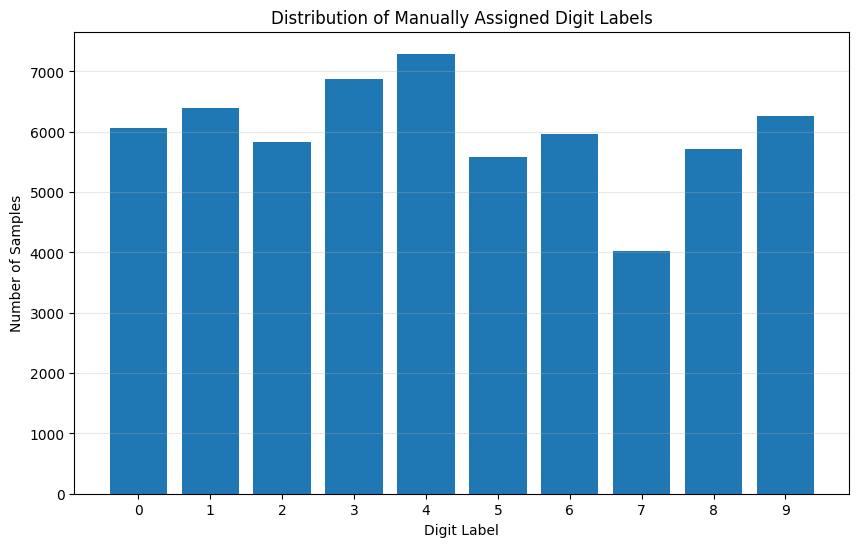


Manual labeling complete! Digit labels saved as 'Y_train_digit_labels.npy'
Mapping from clusters to digits saved as 'cluster_to_digit_mapping.npy'


In [11]:
# Verify the distribution of digits
unique_digits, digit_counts = np.unique(Y_train_digits, return_counts=True)
print("\n=== DIGIT LABEL DISTRIBUTION ===")
for digit, count in zip(unique_digits, digit_counts):
    print(f"Digit {digit}: {count} samples ({count/len(Y_train_digits)*100:.1f}%)")

# Visualize the digit distribution
plt.figure(figsize=(10, 6))
plt.bar(unique_digits, digit_counts)
plt.xlabel('Digit Label')
plt.ylabel('Number of Samples')
plt.title('Distribution of Manually Assigned Digit Labels')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nManual labeling complete! Digit labels saved as 'Y_train_digit_labels.npy'")
print("Mapping from clusters to digits saved as 'cluster_to_digit_mapping.npy'")

## Classifier Evaluation

Train and evaluate multiple classifier models on our newly labeled dataset.

Loading generated labels and embeddings...
Preparing dataset...
Training set: (48000, 50), Validation set: (12000, 50)

=== CLASSIFIER EVALUATION ===
--------------------------------------------------------------------------------
Classifier                Accuracy   Training Time   Cross-Val Score
--------------------------------------------------------------------------------
Evaluating Random Forest...
Random Forest             0.9413     65.2464s        0.9447
Evaluating KNN...
KNN                       0.9665     0.0040s        0.9677


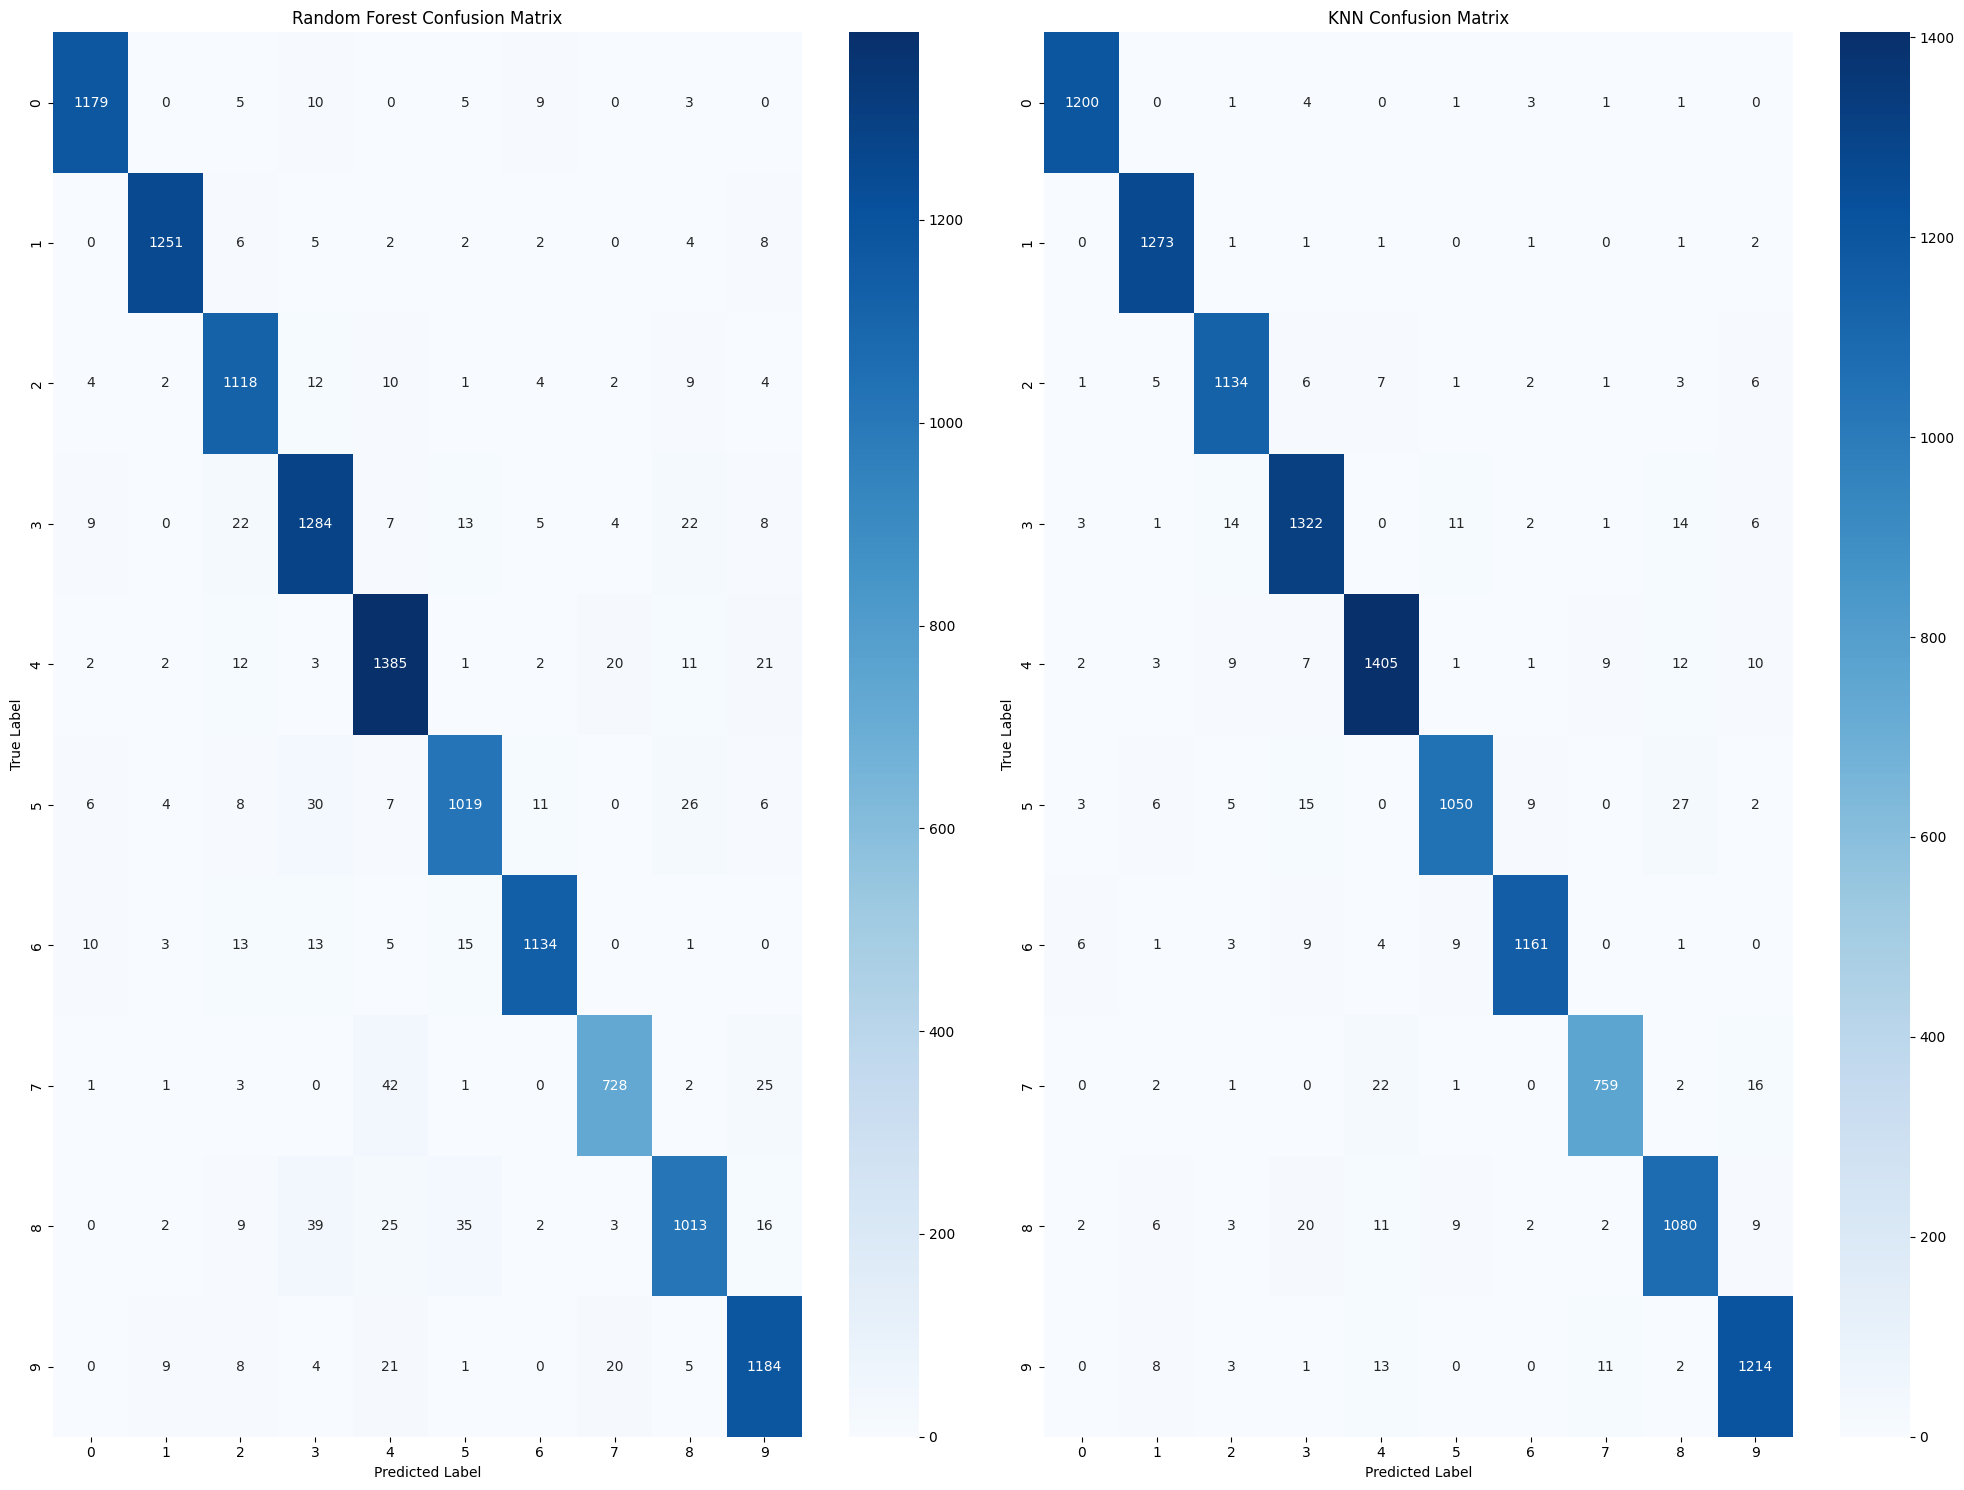

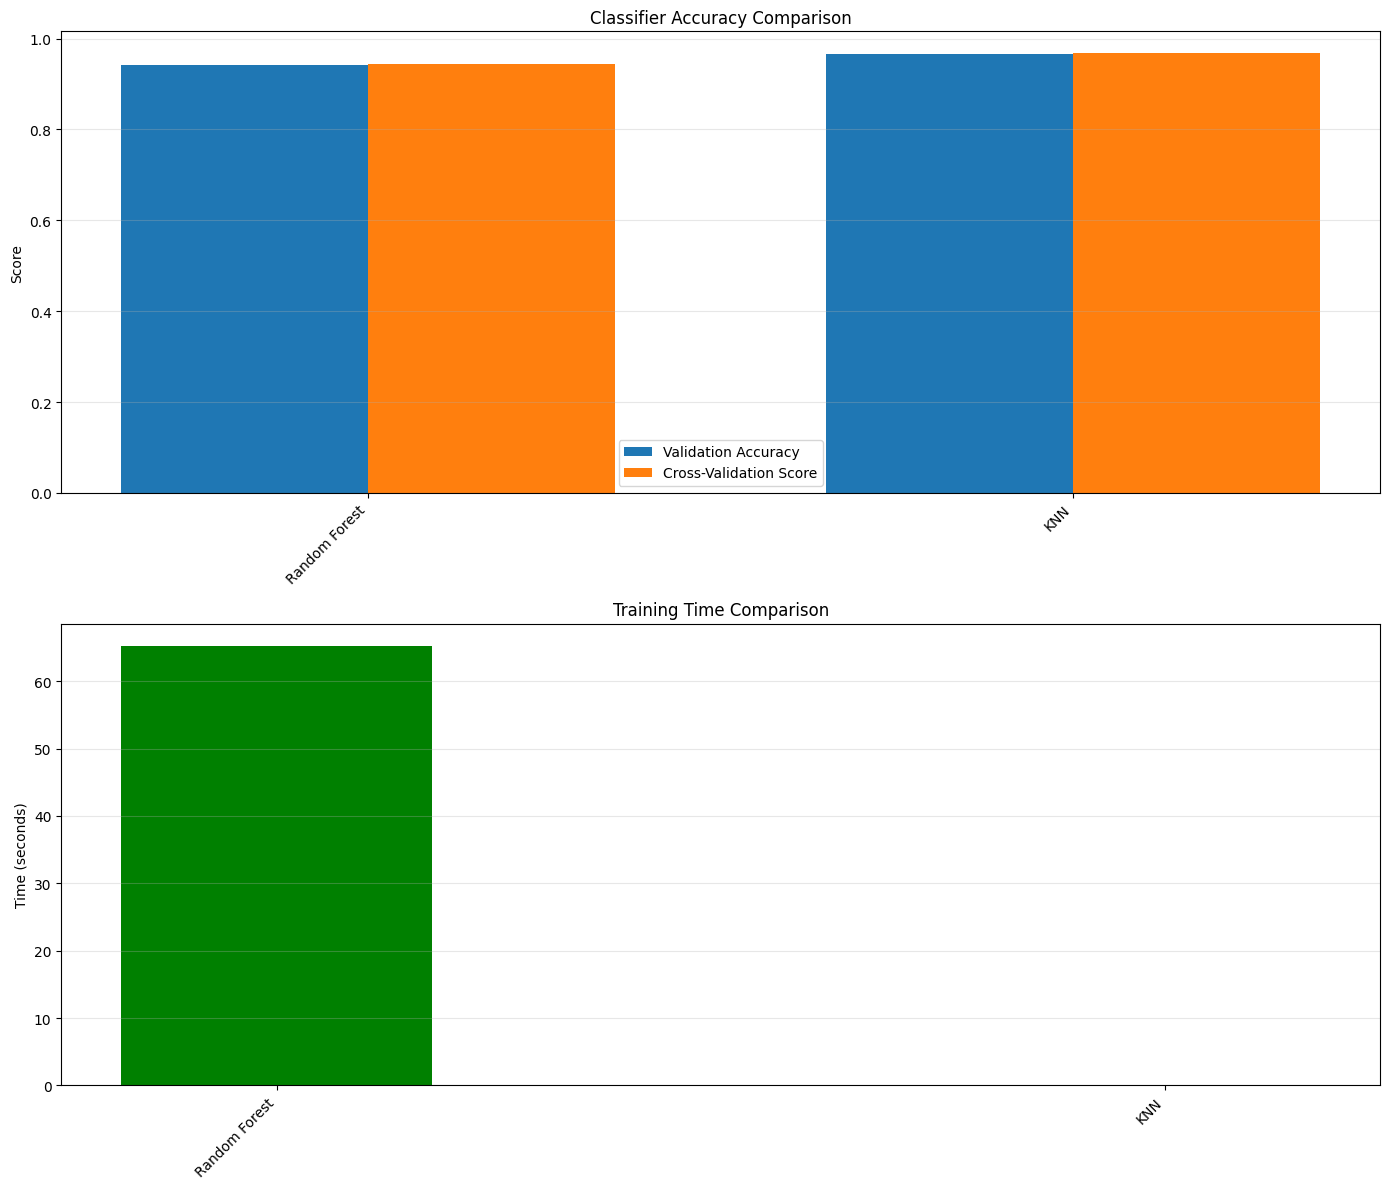


=== BEST MODEL ===
Best classifier: KNN
Validation accuracy: 0.9665
Cross-validation score: 0.9677

Detailed Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1211
           1       0.98      0.99      0.98      1280
           2       0.97      0.97      0.97      1166
           3       0.95      0.96      0.96      1374
           4       0.96      0.96      0.96      1459
           5       0.97      0.94      0.95      1117
           6       0.98      0.97      0.98      1194
           7       0.97      0.95      0.96       803
           8       0.94      0.94      0.94      1144
           9       0.96      0.97      0.96      1252

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000


Class-wise Performance Metrics:


,Precision,Recall,F1-score,Support
Digit 0,0.986031,0.990917,0.988468,1211
Digit 1,0.975479,0.994531,0.984913,1280
Digit 2,0.965928,0.972556,0.969231,1166
Digit 3,0.954513,0.962154,0.958318,1374
Digit 4,0.960355,0.962988,0.961670,1459
Digit 5,0.969529,0.940018,0.954545,1117
Digit 6,0.983065,0.972362,0.977684,1194
Digit 7,0.968112,0.945205,0.956522,803
Digit 8,0.944882,0.944056,0.944469,1144
Digit 9,0.959684,0.969649,0.964640,1252



Saving the best model...
Model saved as best_knn_model.pkl


In [1]:
# Testing multiple classifier types on our generated labels
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import joblib

def plot_confusion_matrix(ax, cm, title, class_names):
    """
    Plot confusion matrix on the provided axis.
    
    Parameters:
        ax: Matplotlib axis to plot on
        cm: Confusion matrix
        title: Title for the plot
        class_names: Names of classes
    """
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, 
                xticklabels=class_names, yticklabels=class_names)
    ax.set_title(title)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

def evaluate_classifiers(X_train, Y_train, test_size=0.2, random_state=42):
    """
    Evaluates multiple classifiers on the dataset and returns detailed metrics.
    
    Parameters:
        X_train: Features
        Y_train: Target labels
        test_size: Fraction of data to use for testing
        random_state: Random seed for reproducibility
        
    Returns:
        Dictionary of results for each classifier
    """
    print("Preparing dataset...")
    
    # Scale features if they aren't already
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    
    # Split into training and validation sets
    X_train_clf, X_val, y_train_clf, y_val = train_test_split(
        X_scaled, Y_train, test_size=test_size, random_state=random_state, stratify=Y_train
    )
    
    print(f"Training set: {X_train_clf.shape}, Validation set: {X_val.shape}")
    
    # Define classifiers to test
    classifiers = {
        "Random Forest": RandomForestClassifier(n_estimators=100, min_samples_leaf=2, class_weight='balanced', random_state=random_state),
        #"SVM (RBF)": SVC(kernel='rbf', C=10, gamma='scale', probability=True, class_weight='balanced', random_state=random_state),
        #"SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced', random_state=random_state),
        "KNN": KNeighborsClassifier(n_neighbors=5)
        #"Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=random_state),
        #"Neural Network (5)": MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=random_state),
        #"Neural Network (5,5)": MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000, random_state=random_state)
    }
    
    # Results storage
    results = {}
    
    print("\n=== CLASSIFIER EVALUATION ===")
    print("-" * 80)
    print(f"{'Classifier':<25} {'Accuracy':<10} {'Training Time':<15} {'Cross-Val Score':<15}")
    print("-" * 80)
    
    for name, clf in classifiers.items():
        print(f"Evaluating {name}...")
        
        # Time the training
        start_time = time.time()
        clf.fit(X_train_clf, y_train_clf)
        train_time = time.time() - start_time
        
        # Make predictions
        y_pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        
        # Get detailed metrics
        precision, recall, f1, support = precision_recall_fscore_support(y_val, y_pred, average=None)
        
        # Create metrics DataFrame
        metrics_df = pd.DataFrame({
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
            'Support': support
        }, index=[f"Digit {i}" for i in range(10)])
        
        # Cross-validation score
        cv_scores = cross_val_score(clf, X_scaled, Y_train, cv=5)
        mean_cv = np.mean(cv_scores)
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_val, y_pred)
        
        # Try to get probabilities (some models like KNN don't support this)
        try:
            y_proba = clf.predict_proba(X_val)
        except:
            y_proba = None
        
        # Store results
        results[name] = {
            'accuracy': accuracy,
            'train_time': train_time,
            'cv_score': mean_cv,
            'predictions': y_pred,
            'model': clf,
            'metrics_df': metrics_df,
            'conf_matrix': conf_matrix,
            'y_proba': y_proba,
            'y_test': y_val
        }
        
        print(f"{name:<25} {accuracy:.4f}     {train_time:.4f}s        {mean_cv:.4f}")
    
    return results

# Load saved models and data
print("Loading generated labels and embeddings...")
X_train_pca = np.load("X_train_pca_embedded.npy")
Y_train = np.load("Y_train_digit_labels.npy")  # Using manually assigned digit labels

# Evaluate classifiers
results = evaluate_classifiers(X_train_pca, Y_train)

# Plot confusion matrices
plt.figure(figsize=(20, 15))
num_classifiers = len(results)
rows = (num_classifiers + 1) // 2  # Calculate number of rows needed
cols = 2

for idx, (name, result) in enumerate(results.items()):
    ax = plt.subplot(rows, cols, idx + 1)
    plot_confusion_matrix(ax, result['conf_matrix'], f"{name} Confusion Matrix", range(10))

plt.tight_layout()
plt.savefig("classifier_confusion_matrices.png")
plt.show()

# Plot classification metrics comparison
def plot_metrics_comparison(results):
    metrics = ['accuracy', 'cv_score', 'train_time']
    metric_names = ['Validation Accuracy', 'Cross-Validation Score', 'Training Time (s)']
    
    # Create separate plots for accuracy metrics and training time
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Get classifier names
    names = list(results.keys())
    x = np.arange(len(names))
    width = 0.35
    
    # Plot accuracy metrics
    accuracies = [results[name]['accuracy'] for name in names]
    cv_scores = [results[name]['cv_score'] for name in names]
    
    axes[0].bar(x - width/2, accuracies, width, label='Validation Accuracy')
    axes[0].bar(x + width/2, cv_scores, width, label='Cross-Validation Score')
    axes[0].set_ylabel('Score')
    axes[0].set_title('Classifier Accuracy Comparison')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(names, rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Plot training time
    train_times = [results[name]['train_time'] for name in names]
    axes[1].bar(x, train_times, width, color='green')
    axes[1].set_ylabel('Time (seconds)')
    axes[1].set_title('Training Time Comparison')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(names, rotation=45, ha='right')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig("classifier_metrics_comparison.png")
    plt.show()

# Plot metrics comparison
plot_metrics_comparison(results)

# Find and analyze the best model
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_result = results[best_model_name]
best_model = best_result['model']
best_accuracy = best_result['accuracy']

print("\n=== BEST MODEL ===")
print(f"Best classifier: {best_model_name}")
print(f"Validation accuracy: {best_accuracy:.4f}")
print(f"Cross-validation score: {best_result['cv_score']:.4f}")

print("\nDetailed Classification Report for Best Model:")
print(classification_report(best_result['y_test'], best_result['predictions']))

print("\nClass-wise Performance Metrics:")
display(best_result['metrics_df'])

# Save the best model
print("\nSaving the best model...")
joblib.dump(best_model, f"best_{best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"Model saved as best_{best_model_name.replace(' ', '_').lower()}_model.pkl")

## Best Model Analysis

Detailed analysis of the best-performing classifier model.


=== BEST MODEL ===
Best classifier: KNN
Validation accuracy: 0.9713

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1211
           1       0.98      0.99      0.99      1280
           2       0.98      0.99      0.98      1166
           3       0.97      0.97      0.97      1374
           4       0.96      0.97      0.97      1459
           5       0.97      0.94      0.96      1117
           6       0.99      0.98      0.98      1194
           7       0.98      0.94      0.96       803
           8       0.95      0.96      0.95      1144
           9       0.96      0.97      0.97      1252

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



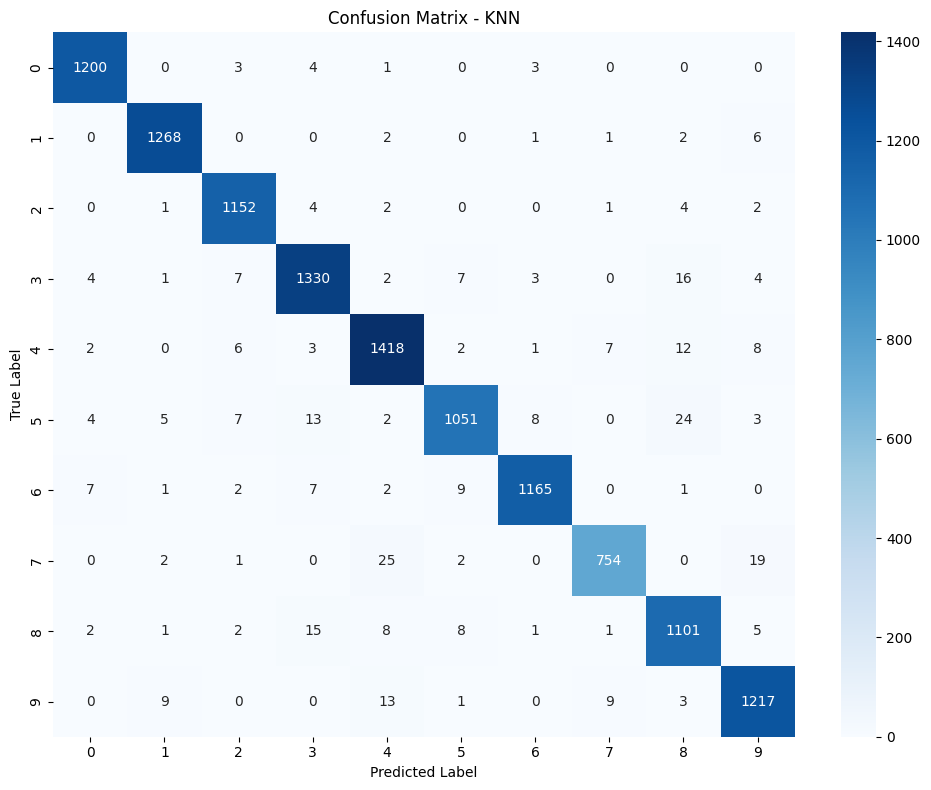

In [20]:
# Find the best model
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print("\n=== BEST MODEL ===")
print(f"Best classifier: {best_model_name}")
print(f"Validation accuracy: {best_accuracy:.4f}")

# Detailed evaluation of the best model
y_pred_best = results[best_model_name]['predictions']
print("\nClassification Report:")
print(classification_report(y_val, y_pred_best))

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_val, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## Model Comparison

Comparative analysis of all classifier performance metrics.

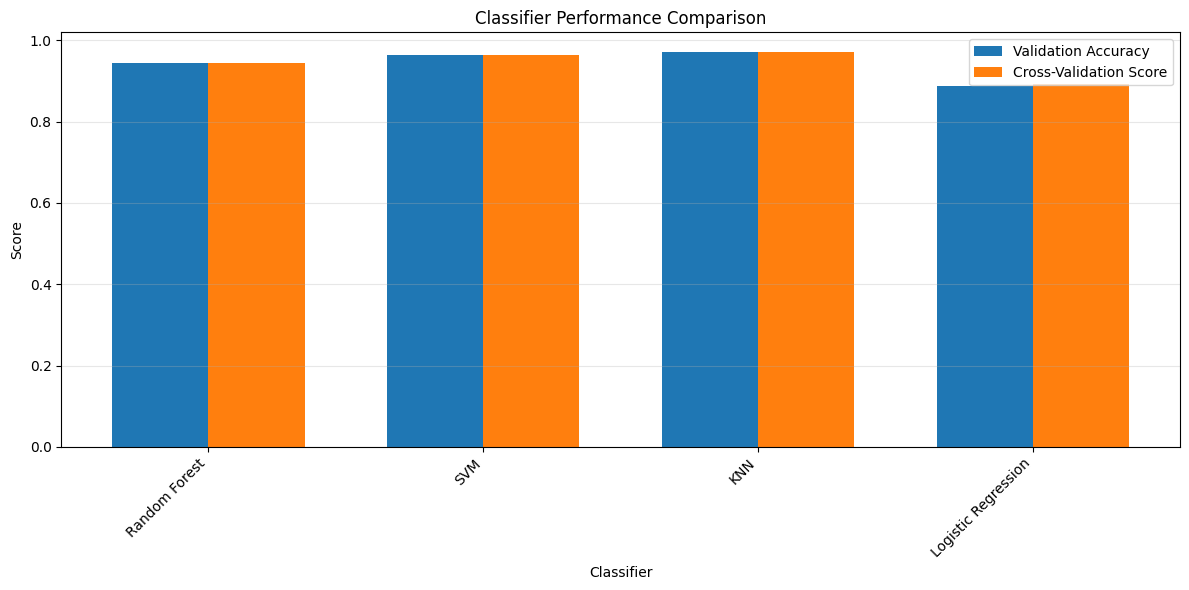


Saving the best model...
Model saved as best_knn_model.pkl


In [21]:
# Plot accuracy comparison
plt.figure(figsize=(12, 6))
names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in names]
cv_scores = [results[name]['cv_score'] for name in names]

x = np.arange(len(names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Validation Accuracy')
plt.bar(x + width/2, cv_scores, width, label='Cross-Validation Score')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(x, names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Save the best model
print("\nSaving the best model...")
joblib.dump(best_model, f"best_{best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"Model saved as best_{best_model_name.replace(' ', '_').lower()}_model.pkl")

## Prediction Function

Function to use the best model for making predictions on new data.

In [22]:
# Function to use the best model
def predict_with_best_model(new_data):
    """
    Process new data and make predictions using the best trained model
    
    Args:
        new_data: New image data to classify
        
    Returns:
        Array of predicted digit labels
    """
    # Reshape if needed
    if len(new_data.shape) > 2:
        new_data = new_data.reshape(new_data.shape[0], -1)
    
    # Apply the same preprocessing
    new_data_scaled = scaler.transform(new_data)
    new_data_pca = pca.transform(new_data_scaled)
    
    # Make predictions using the best classifier
    predictions = best_model.predict(new_data_pca)
    return predictions

# Example usage:
# test_predictions = predict_with_best_model(test_data)